In [2]:
import matplotlib.pyplot as plt

(0.0, 6.0, 0.0, 20.0)

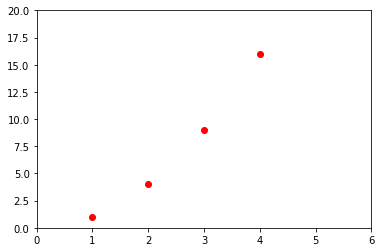

(0.0, 100.0, 0.0, 100.0)

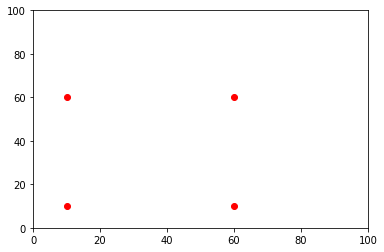

In [8]:
plt.plot([60, 10, 10, 60], [60, 60, 10, 10], 'ro')
plt.axis([0, 100, 0, 100])

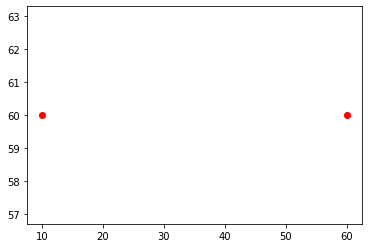

In [18]:
plt.plot(60, 60, 'ro')
plt.plot(10, 60, 'ro')

In [53]:
def transform_square(p1, p2, p3, p4, scale):
    def translate_pt_on_line(pa, pb, scale):
        x1,y1 = pa
        x2,y2 = pb
        mx = x2-x1
        my = y2-y1
        n_x1 = x1 + scale*mx
        n_y1 = y1 + scale*my
        return (n_x1, n_y1)
    
    n_p1 = translate_pt_on_line(p1, p2, scale)
    n_p2 = translate_pt_on_line(p2, p3, scale)
    n_p3 = translate_pt_on_line(p3, p4, scale)
    n_p4 = translate_pt_on_line(p4, p1, scale)
    return n_p1, n_p2, n_p3, n_p4

In [59]:
p1 = (0,10)
p2 = (0,0)
p3 = (10,0)
p4 = (10,10)
n_p1, n_p2, n_p3, n_p4 = transform_square(p1, p2, p3, p4, 0.8)
nn_p1, nn_p2, nn_p3, nn_p4 = transform_square(n_p1, n_p2, n_p3, n_p4, 0.8)

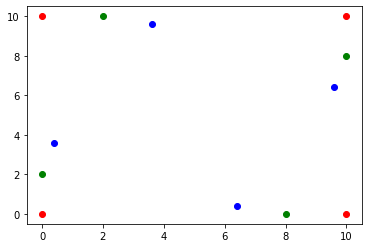

In [60]:
for p in [p1, p2, p3, p4]:
    plt.plot(p[0], p[1], 'ro')
for p in [n_p1, n_p2, n_p3, n_p4]:
    plt.plot(p[0], p[1], 'go')
for p in [nn_p1, nn_p2, nn_p3, nn_p4]:
    plt.plot(p[0], p[1], 'bo')

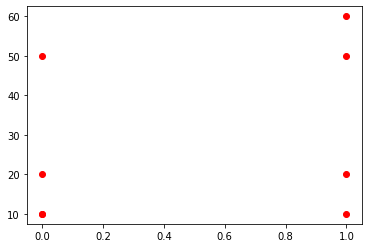

In [22]:
for p in [n_p1, n_p2, n_p3, n_p4]:
    plt.plot(p, 'ro')

In [37]:
def translate_pt_on_line(p1, p2, scale):
        x1,y1 = p1
        x2,y2 = p2
        mx = x2-x1
        my = y2-y1
        n_x1 = x1 + scale*mx
        n_y1 = y1 + scale*my
        return (n_x1, n_y1)

In [40]:
p1 = (0,10)
p2 = (0,0)
p3 = (10,0)
p4 = (10,10)
translate_pt_on_line(p1, p2, 0.8)

(0.0, 2.0)

In [41]:
translate_pt_on_line(p2, p3, 0.8)

(8.0, 0.0)

In [43]:
translate_pt_on_line(p3, p4, 0.8)

(10.0, 8.0)

In [44]:
translate_pt_on_line(p4, p1, 0.8)

(2.0, 10.0)

In [9]:
def virtual_to_physical_coordinate(pv, display_dimension):
    (width, height) = display_dimension
    (xv, yv) = pv
    m = width / 2
    n = height / 2
    if xv > m or xv < -m:
        raise ValueError("input virtual coordinate x out of bound of physical display")
    if yv > n or yv < -n:
        raise ValueError("input virtual coordinate y out of bound of physical display")
    # Convertion
    xp = xv + m
    yp = yv + n
    return (xp, yp)

In [10]:
virtual_to_physical_coordinate((0, 0), (160, 128))

(80.0, 64.0)

In [11]:
def fill_square_around_pv(display, pv, display_dimension, square_length, color):
    (width, height) = display_dimension
    (xv, yv) = pv
    m = width / 2
    n = height / 2
    if xv-square_length < -m or xv+square_length > m:
        raise ValueError("input virtual coordinate x causes square to go out of bound in physical display")
    if yv-square_lenght < -n or yv+square_length > n:
        raise ValueError("input virtual coordinate y causes square to go out of bound in physical display")
    
    (xp, yp) = virtual_to_physical_coordinate(pv, display_dimension)
    ltp = ((xp - square_len), (yp - square_len))
    display.fill(ltp[0], ltp[1], square_length, square_length, color)

In [4]:
import math
class vector_helper:
    @staticmethod
    def virtual_to_physical_coordinate(display_dimension, pv):
        max_x, max_y = display_dimension
        (xv, yv) = pv
        m = max_x / 2
        n = max_y / 2
        if xv > m or xv < -m:
            warn(f"input virtual coordinate x ({xv}) out of bound of physical display")
        if yv > n or yv < -n:
            warn(f"input virtual coordinate y ({yv}) out of bound of physical display")
        # Convertion
        xp = xv + m
        yp = -yv + n
        return (xp, yp)

    @staticmethod
    def rotate_around_center(pc, p, degree):
        alpha = radians(degree)
        pcx, pcy = pc
        dx, dy = -pcx, -pcy
        x, y = p
        sa, ca = sin(alpha), cos(alpha)
        xp = ca*x - sa*y + dx*ca-dy*sa-dx
        yp = sa*x + ca*y + dx*sa+dy*ca-dy
        return (xp, yp)

    @staticmethod
    def translate_pt_on_line(pa, pb, scale, translate_pt=0):
        x1,y1 = pa
        x2,y2 = pb
        mx = x2-x1
        my = y2-y1
        if translate_pt == 0:
            n_x = x1 + scale*mx
            n_y = y1 + scale*my
        elif translate_pt == 1:
            n_x = x2 + scale*mx
            n_y = y2 + scale*my
        else:
            raise ValueError("invalid translate_pt, it needs to be either 0 or 1")
        return (n_x, n_y)
    
    @staticmethod
    def world_to_viewer_transform(pw, pv):
        pvx, pvy, pvz = pv
        pwx, pwy, pwz = pw
        rho = math.sqrt(pvx**2+pvy**2+pvz**2)
        mu = math.sqrt(pvx**2+pyv**2)
        st = pvy/mu
        ct = pvx/mu
        sp = mu/rho
        cp = pvz/rho
        ptx = -st*pwx + ct*pwy
        pty = -cp*ct*pwx - cp*st*pwy + sp*pwz
        ptz = -sp*ct*pwx - sp*ct*pwy - cp*pwz + rho
        return (ptx,pty,ptz)
    def perspective_projection(pt, D):
        ptx, pty, ptz = pt
        ppx = D*ptx/ptz
        ppy = D*pty/ptz
        return (ppx,ppy)